# **Importing the Libraries**

In [284]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import math

# **Question 1(In Lab Submission)**

In [285]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


# df is our dataframe object now the output of titanic dataset is Survived, which is clearly independent of what the passenger id,name,ticket of the passenger is. So, we drop all these irrelevant features.

In [286]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived
0,3,male,22.0,7.2500,NaN,S,0
1,1,female,38.0,71.2833,C85,C,1
2,3,female,26.0,7.9250,NaN,S,1
3,1,female,35.0,53.1000,C123,S,1
4,3,male,35.0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,NaN,S,0
887,1,female,19.0,30.0000,B42,S,1
888,3,female,NaN,23.4500,NaN,S,0
889,1,male,26.0,30.0000,C148,C,1


# Now, we analyse our data for NaN values, and deal with the NaN values via some appropriate techniques.

In [287]:
print(df.isna().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64


# We observe that Cabin feature has about 75% of the data as NaN values.So, there is clearly very less data avaialable to us for Cabin column.Considering the factor of insufficient data we drop the column Cabin as well

In [288]:
df.drop('Cabin',axis=1,inplace=True)
print(df.isna().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64


# For age column we replace the nan values by the mean of age of the other passengers.

In [289]:
df.Age.fillna(df.Age.mean(),inplace=True)
print(df.isna().sum())

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Survived    0
dtype: int64


# Now, out of the 891 columns only 2 of columns have embarked=NaN which is significantly less, so we can safely drop the NaN datapoints remaining.

In [290]:
df.dropna(inplace=True)
print(df.isna().sum())

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64


# Encoding Sex attribute to integer values

In [291]:
def gender(sex):
  if(sex=='male'):
    return 1
  else:
    return 2
df['sex']=df.Sex.apply(gender)
del df['Sex']
df

,Pclass,Age,Fare,Embarked,Survived,sex
0,3,22.000000,7.2500,S,0,1
1,1,38.000000,71.2833,C,1,2
2,3,26.000000,7.9250,S,1,2
3,1,35.000000,53.1000,S,1,2
4,3,35.000000,8.0500,S,0,1
...,...,...,...,...,...,...
886,2,27.000000,13.0000,S,0,1
887,1,19.000000,30.0000,S,1,2
888,3,29.699118,23.4500,S,0,2
889,1,26.000000,30.0000,C,1,1


# Encoding embarked column

In [292]:
def embark(embarked):
  if(embarked=='S'):
    return 1
  elif(embarked=='C'):
    return 2
  else:
    return 3
df['embarked']=df.Embarked.apply(embark)
del df['Embarked']
df

,Pclass,Age,Fare,Survived,sex,embarked
0,3,22.000000,7.2500,0,1,1
1,1,38.000000,71.2833,1,2,2
2,3,26.000000,7.9250,1,2,1
3,1,35.000000,53.1000,1,2,1
4,3,35.000000,8.0500,0,1,1
...,...,...,...,...,...,...
886,2,27.000000,13.0000,0,1,1
887,1,19.000000,30.0000,1,2,1
888,3,29.699118,23.4500,0,2,1
889,1,26.000000,30.0000,1,1,2


# Normalising the age,Fare column

In [293]:
from sklearn.preprocessing import MinMaxScaler
age=np.array(df['Age']).reshape(-1,1)
scaler=MinMaxScaler()
scaler.fit(age)
df['age']=scaler.transform(age)
del df['Age']
fare=np.array(df['Fare']).reshape(-1,1)
scaler=MinMaxScaler()
scaler.fit(fare)
df['fare']=scaler.transform(age)
del df['Fare']
df

,Pclass,Survived,sex,embarked,age,fare
0,3,0,1,1,0.271174,0.042941
1,1,1,2,2,0.472229,0.074171
2,3,1,2,1,0.321438,0.050749
3,1,1,2,1,0.434531,0.068315
4,3,0,1,1,0.434531,0.068315
...,...,...,...,...,...,...
886,2,0,1,1,0.334004,0.052700
887,1,1,2,1,0.233476,0.037086
888,3,0,2,1,0.367921,0.057969
889,1,1,1,2,0.321438,0.050749


# **Visualising the data**

# Using Pie Chart

In [294]:
import matplotlib.pyplot as plt
'''
we define a function which takes the respective % values(of survival rate) 
along with the label in a list and plot a pie plot
'''
def plot_pie(labels,values):
  plt.pie(values,labels=labels)
  plt.show()
  for i in range(len(labels)):
    print(labels[i],":",values[i]*100,"%")

In [295]:
survived_df=df[df['Survived']==1]
not_survived_df=df[df['Survived']==0]

# For PClass

For passengers who survived Pclass :


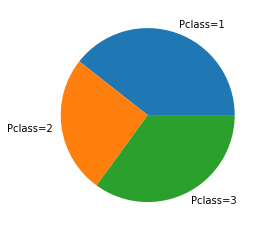

Pclass=1 : 39.411764705882355 %
Pclass=2 : 25.588235294117645 %
Pclass=3 : 35.0 %


In [296]:
Survived_PClass_values=[]
for i in range(1,4):
  Survived_PClass_values.append(len(survived_df[survived_df['Pclass']==i])/len(survived_df))
labels=['Pclass=1','Pclass=2','Pclass=3']
print('For passengers who survived Pclass :')
plot_pie(labels,Survived_PClass_values)

For passengers who didnot survived Pclass :


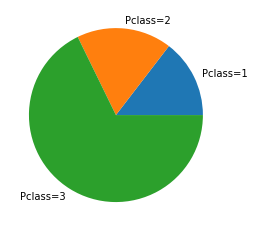

Pclass=1 : 14.571948998178508 %
Pclass=2 : 17.66848816029144 %
Pclass=3 : 67.75956284153006 %


In [297]:
Not_survived_PClass_values=[]
for i in range(1,4):
  Not_survived_PClass_values.append(len(not_survived_df[not_survived_df['Pclass']==i])/len(not_survived_df))
labels=['Pclass=1','Pclass=2','Pclass=3']
print('For passengers who didnot survived Pclass :')
plot_pie(labels,Not_survived_PClass_values)

# So, via data visualisation and the rate of different passenger class people who survived and didnt survived we can clearly see that if we change the Pclass that greatly affects if the passengers survived or not(like Pclass=3 passengers have a greater death rate than others). So we have to take Pclass feature into consideration.

# For Sex

For passengers who survived gender :


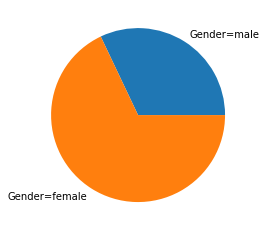

Gender=male : 32.05882352941177 %
Gender=female : 67.94117647058823 %


In [298]:
Survived_gender_values=[]
for i in range(1,3):
  Survived_gender_values.append(len(survived_df[survived_df['sex']==i])/len(survived_df))
labels=['Gender=male','Gender=female']
print('For passengers who survived gender :')
plot_pie(labels,Survived_gender_values)

For passengers who didnt survived gender :


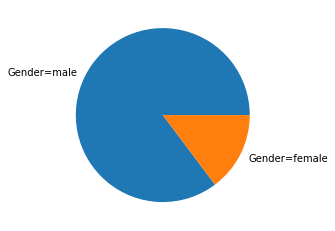

Gender=male : 85.24590163934425 %
Gender=female : 14.754098360655737 %


In [299]:
Not_Survived_gender_values=[]
for i in range(1,3):
  Not_Survived_gender_values.append(len(not_survived_df[not_survived_df['sex']==i])/len(not_survived_df))
labels=['Gender=male','Gender=female']
print('For passengers who didnt survived gender :')
plot_pie(labels,Not_Survived_gender_values)

# Again we can see that the females have much higher survival rate so is important feature to classify as survived and not survived.So, we can't drop the sex column as it is relevant for predicting output.

# For Embarked

For passengers who survived embarked :


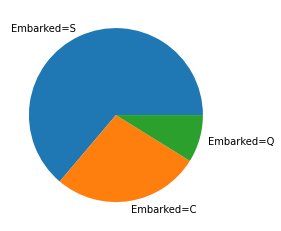

Embarked=S : 63.8235294117647 %
Embarked=C : 27.35294117647059 %
Embarked=Q : 8.823529411764707 %


In [300]:
Survived_embarked_values=[]
for i in range(1,4):
  Survived_embarked_values.append(len(survived_df[survived_df['embarked']==i])/len(survived_df))
labels=['Embarked=S','Embarked=C','Embarked=Q']
print('For passengers who survived embarked :')
plot_pie(labels,Survived_embarked_values)

For passengers who didnot survived embarked :


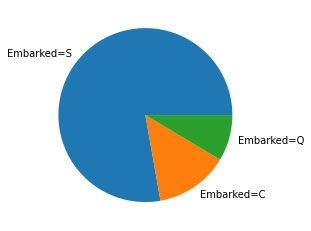

Embarked=S : 77.77777777777779 %
Embarked=C : 13.661202185792352 %
Embarked=Q : 8.561020036429873 %


In [301]:
Not_Survived_embarked_values=[]

for i in range(1,4):
  Not_Survived_embarked_values.append(len(not_survived_df[not_survived_df['embarked']==i])/len(not_survived_df))
labels=['Embarked=S','Embarked=C','Embarked=Q']
print('For passengers who didnot survived embarked :')
plot_pie(labels,Not_Survived_embarked_values)

# Again clearly we can see the survival rate is affected by embarked values.So, we can't drop embarked column as well.

In [302]:
def plot_continuous(feature_name):
  plt.hist([list(survived_df[feature_name]),list(not_survived_df[feature_name])])
  plt.show()

# For Age

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


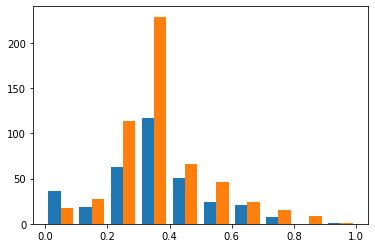

In [303]:
plot_continuous('age')

# For Fare

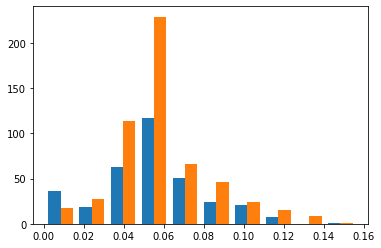

In [304]:
plot_continuous('fare')

# Splitting the data into train test and split

In [305]:
data=df.copy()
output_data=data['Survived']
del data['Survived']
input_data=data
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,train_size=0.7,random_state=1)

In [306]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Pclass  sex  embarked       age      fare
115       3    1         1  0.258608  0.040989
874       2    2         2  0.346569  0.054652
77        3    1         1  0.367921  0.057969
876       3    1         1  0.246042  0.039037
682       3    1         1  0.246042  0.039037
..      ...  ...       ...       ...       ...
716       1    2         2  0.472229  0.074171
768       3    1         3  0.367921  0.057969
73        3    1         2  0.321438  0.050749
236       2    1         1  0.547625  0.085882
37        3    1         1  0.258608  0.040989

[622 rows x 5 columns]
     Pclass  sex  embarked       age      fare
387       2    2         1  0.447097  0.070267
259       2    2         1  0.623021  0.097594
771       3    1         1  0.597889  0.093690
208       3    2         3  0.195778  0.031230
683       3    1         1  0.170646  0.027326
..      ...  ...       ...       ...       ...
248       1    1         1  0.459663  0.072219
601       3    1         1  0.367921

# 2)Identify the best possible variant of naive bayes classifier for the given dataset. Justify your reason for the same

# The possible variants of Naive Bayes are 

# i)Gaussian 

# ii)Multinomial 

# iii)Bernoulli
# We Train model for each of the variant and then check the score first

In [307]:
from sklearn import naive_bayes
gaussian_model=naive_bayes.GaussianNB()
gaussian_model.fit(x_train,y_train)
print('Training Score for gaussian model :',gaussian_model.score(x_train,y_train),'%')
print('Testing Score for gaussian model :',gaussian_model.score(x_test,y_test),'%')

Training Score for gaussian model : 0.7765273311897106 %
Testing Score for gaussian model : 0.8089887640449438 %


In [308]:
multinomial_model=naive_bayes.MultinomialNB()
multinomial_model.fit(x_train,y_train)
print('Training Score for multinomial model :',multinomial_model.score(x_train,y_train),'%')
print('Testing Score for multinomial model :',multinomial_model.score(x_test,y_test),'%')

Training Score for multinomial model : 0.6977491961414791 %
Testing Score for multinomial model : 0.7116104868913857 %


In [309]:
bernoulli_model=naive_bayes.MultinomialNB()
bernoulli_model.fit(x_train,y_train)
print('Training Score for bernoulli model :',bernoulli_model.score(x_train,y_train),'%')
print('Testing Score for bernoulli model :',bernoulli_model.score(x_test,y_test),'%')

Training Score for bernoulli model : 0.6977491961414791 %
Testing Score for bernoulli model : 0.7116104868913857 %


# So, gaussian model has the best performance score wise
# Now, we check if the continuous features(Age and Fare follow normal distribution or not)

In [310]:
import seaborn as sns
def plot_density_distribution(feature_name):
  '''
  Function to plot density function corresponding to a particular feature
  '''
  sns.distplot(df[feature_name], hist=True, kde=True)

For age :


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


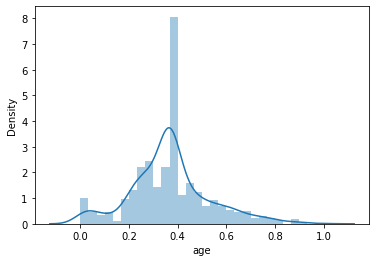

In [311]:
print('For age :')
plot_density_distribution('age')

For Fare : 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


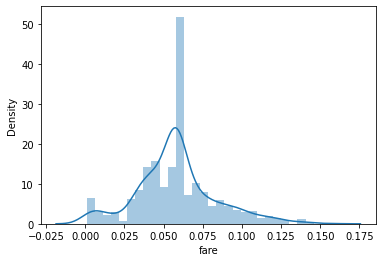

In [312]:
print('For Fare : ')
plot_density_distribution('fare')

# Observing each of the continuous curve we can very cleary say that both the continuous features approximately follows normal distribution and thus gaussian naive bayes would be a good model to fit.
# We also know that gaussian naive bayes works well for continuous valued feature, multinomial works well for categorical/discrete valued feature and bernoulli naive bayes works well for features having binary value, so Gaussian Model would be the best variant in our case.

In [313]:
#confirming the result via f1 score and confusion matrix
from sklearn.metrics import confusion_matrix,f1_score
def get_predicted(x_test,model):
  return model.predict(x_test)
gaussian_predicted=get_predicted(x_test,gaussian_model)
multinomial_predicted=get_predicted(x_test,multinomial_model)
bernoulli_predicted=get_predicted(x_test,bernoulli_model)

In [314]:
print('Confusion matrix for Gaussian : ')
print(confusion_matrix(y_test,gaussian_predicted))
print('Confusion matrix for Multinomial : ')
print(confusion_matrix(y_test,multinomial_predicted))
print('Confusion matrix for Bernoulli : ')
print(confusion_matrix(y_test,bernoulli_predicted))

Confusion matrix for Gaussian : 
[[139  27]
 [ 24  77]]
Confusion matrix for Multinomial : 
[[166   0]
 [ 77  24]]
Confusion matrix for Bernoulli : 
[[166   0]
 [ 77  24]]


In [315]:
print('F1 score for Gaussian : ')
print(f1_score(y_test,gaussian_predicted)*100,'%')
print('F1 score for Multinomial : ')
print(f1_score(y_test,multinomial_predicted)*100,'%')
print('F1 score for Bernoulli : ')
print(f1_score(y_test,bernoulli_predicted)*100,'%')

F1 score for Gaussian : 
75.1219512195122 %
F1 score for Multinomial : 
38.4 %
F1 score for Bernoulli : 
38.4 %


# From the f1 score also it is quite clear that gaussian is the best variant of naive bayes in this case.

# 3)Implement the identified variant of Naive Bayes Classifier using scikit learn,report its performance based on appropriate metrics.(ROC AUC etc)

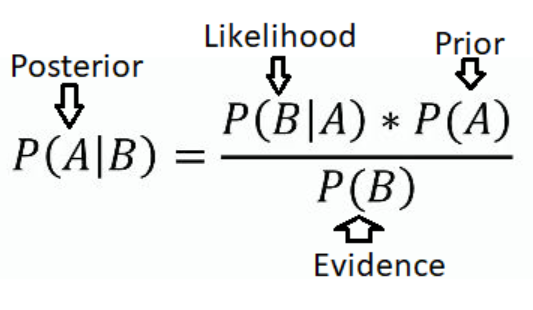
# From the above formula we finally need to implement the gaussian naive bayes model so first we find the prior probability and then the likelihood where we assume each feature as independent and thus univariate normal distribution can be used. Finally, we calculate posterior probability for both classes and compare for whom it is more and get to our answer.

In [316]:
#For prior probabilities
#class ω1(not survived)
not_survived_df=df[df['Survived']==0]
#class ω2(survived)
survived_df=df[df['Survived']==1]
print(not_survived_df)
print(survived_df)

     Pclass  Survived  sex  embarked       age      fare
0         3         0    1         1  0.271174  0.042941
4         3         0    1         1  0.434531  0.068315
5         3         0    1         3  0.367921  0.057969
6         1         0    1         1  0.673285  0.105401
7         3         0    1         1  0.019854  0.003904
..      ...       ...  ...       ...       ...       ...
884       3         0    1         1  0.308872  0.048797
885       3         0    2         3  0.484795  0.076123
886       2         0    1         1  0.334004  0.052700
888       3         0    2         1  0.367921  0.057969
890       3         0    1         3  0.396833  0.062460

[549 rows x 6 columns]
     Pclass  Survived  sex  embarked       age      fare
1         1         1    2         2  0.472229  0.074171
2         3         1    2         1  0.321438  0.050749
3         1         1    2         1  0.434531  0.068315
8         3         1    2         1  0.334004  0.052700
9      

In [317]:
train=x_train
train['Survived']=y_train
test=x_test
test['Survived']=y_test

In [318]:
from sklearn.metrics import roc_curve,roc_auc_score
#now we obtain the prior_probability(ωi)=(count of number of datapoints with class ωi)/(total datapoints)
class GaussianNaiveBayes(object):
  def __init__(self,df=df):
      self.df=df
      self.dataframe=self.df
      self.survived_dataframe=self.df[self.df['Survived']==1]
      self.not_survived_dataframe=self.df[self.df['Survived']==0]
      self.feature_names=self.df.columns[:-1]
      self.categorical_features=['Pclass','embarked','sex']
      self.continuous_features=['age','fare']
      self.total_datapoints=len(self.df)
  def get_prior_probability(self,class_label):
      '''
      Returns the prior probability of the given class label(0=>not survived and 1=>survived)
      '''
      if(class_label==0):
        return len(self.not_survived_dataframe)/self.total_datapoints
      else:
        return len(self.survived_dataframe)/self.total_datapoints
  def categorical_likelihood(self,feature_name,test_point_feature_value,class_label):
      '''
      We want P(f1=x1|y=ωi) ie. (count of datapoints with f1=x1 and y=ωi)/(count of number of ωi)
      '''
      #for y=ω1 we have dataframe as not_survived_dataframe among which we find corresponding values
      if(class_label==0):
        not_survived=self.not_survived_dataframe[feature_name]
        count_of_feature_labels=dict(Counter(not_survived))
        return (1+(count_of_feature_labels.get(test_point_feature_value,0)))/(len(set(df[feature_name]))+len(self.not_survived_dataframe))
      else:
        survived=self.survived_dataframe[feature_name]
        count_of_feature_labels=dict(Counter(survived))
        return (1+(count_of_feature_labels.get(test_point_feature_value,0)))/(len(set(df[feature_name]))+len(self.survived_dataframe))
  def gaussian_likelihood(self,feature_name,test_point_feature_value,class_label):
      # p(x)=(e^(−(x − μ)2/2σ2))/√2πσ so applying the same
      standard_deviation=0
      mean=0
      if(class_label==0):
        standard_deviation=(self.not_survived_dataframe[feature_name]).std()
        mean=(self.not_survived_dataframe[feature_name]).mean()
      else:
        standard_deviation=(self.survived_dataframe[feature_name]).std()
        mean=(self.survived_dataframe[feature_name]).mean()
      power=(-0.5)*(((test_point_feature_value-mean)/standard_deviation)**2)
      return ((math.exp(power))/(math.sqrt(2*math.pi)*standard_deviation))
  def get_posterior_probability_point(self,feature_vector,class_label):
      '''
      We want P(y=ωi|X=x)=(P(f1=x1|y=ωi)*P(f2=x2|y=ωi)*P(f3=x3|y=ωi)*P(f4=x4|y=ωi)*P(f5=x5|y=ωi))*P(ωi)
      For a single datapoint
      '''
      #for probability 1 we have feature f1 as Pclass which is categorical
      prob_1=self.categorical_likelihood('Pclass',feature_vector[0],class_label)
      #for probability 2 we have feature f2 as sex which is categorical
      prob_2=self.categorical_likelihood('sex',feature_vector[1],class_label)
      #for probability 3 we have feature f3 as embarked which is categorical
      prob_3=self.categorical_likelihood('embarked',feature_vector[2],class_label)
      #for probability 4 we have feature f4 as age which is continuous
      prob_4=self.gaussian_likelihood('age',feature_vector[3],class_label)
      #for probability 5 we have feature f5 as fare which is continuous
      prob_5=self.gaussian_likelihood('fare',feature_vector[4],class_label)
      return (prob_1*prob_2*prob_3*prob_4*prob_5)*(self.get_prior_probability(class_label))
  def predict_point(self,feature_vector):
      '''
      Function to predict the class of a point whose feature_vector we pass
      '''
      posterior_class_0=self.get_posterior_probability_point(feature_vector,0)
      posterior_class_1=self.get_posterior_probability_point(feature_vector,1)
      if(posterior_class_0>posterior_class_1):
        return 0
      else:
        return 1
  def get_probability(self,feature_vector):
      '''
      Function to calculate probability of prediction for each class
      '''
      posterior_class_0=self.get_posterior_probability_point(feature_vector,0)
      posterior_class_1=self.get_posterior_probability_point(feature_vector,1)
      evidence_probability=posterior_class_0+posterior_class_1
      return [posterior_class_0/evidence_probability,posterior_class_1/evidence_probability]
  def predict(self,x_test):
      '''
      Function which returns y_predicted for testing points given to us
      '''
      y_predicted=[]
      for i in range(len(x_test)):
        feature_vector=list(x_test.iloc[i,:])
        y_predicted.append(self.predict_point(feature_vector))
      return y_predicted
  def predict_proba(self,x_test):
      '''
      Function which returns probabilities for each class for testing points given to us
      '''
      proba_predicted=[]
      for i in range(len(x_test)):
        feature_vector=list(x_test.iloc[i,:])
        proba_predicted.append(self.get_probability(feature_vector))
      return proba_predicted
  def get_positive_rate(self,x_test,y_test):
      proba_predicted=self.predict_proba(x_test)
      prob_estimate_of_positive_class=[]
      for i in proba_predicted:
        prob_estimate_of_positive_class.append(i[1])
      false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,prob_estimate_of_positive_class)
      return false_positive_rate,true_positive_rate
  def plot_roc(self,x_test,y_test):
      '''
      Function plots roc curve 
      '''
      false_positive_rate,true_positive_rate=self.get_positive_rate(x_test,y_test)
      plt.plot(false_positive_rate,true_positive_rate)
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC Curve')
      plt.show()
  def get_auc_score(self,x_test,y_test):
      '''
      return Area Under the curve
      '''
      proba_predicted=self.predict_proba(x_test)
      prob_estimate_of_positive_class=[]
      for i in proba_predicted:
        prob_estimate_of_positive_class.append(i[1])
      return roc_auc_score(y_test,prob_estimate_of_positive_class)
  def get_metrics(self,x_test,y_test):
      '''
      Returns confusion_matrix,precision,recall and f1_score
      '''
      x_test=np.array(x_test)
      y_test=np.array(y_test)
      true_positive=0
      true_negative=0
      false_positive=0
      false_negative=0
      for i in range(len(y_predict)):
        if(y_predict[i]==y_test[i]):
          if(y_predict[i]==1):
            true_positive+=1
          else:
            true_negative+=1
        else:
          if(y_predict[i]==1):
            false_positive+=1
          else:
            false_negative+=1
      precision=true_positive/(true_positive+false_positive)
      recall=true_positive/(true_positive+false_negative)
      return [[true_negative,false_positive],[false_negative,true_positive]],precision*100,recall*100,((2*precision*recall)/(precision+recall))*100
  def score(self,y_pred,y_actual):
    '''
    Returns the accuracy score of our algorithm
    '''
    numerator=0
    for i in range(len(y_pred)):
      if(y_pred[i]==y_actual[i]):
        numerator+=1
    return numerator/len(y_pred)

In [319]:
model=GaussianNaiveBayes()
y_predict=np.array(model.predict(x_test))
probability=model.predict_proba(x_test)

In [320]:
print('y predicted array : ')
print(y_predict)

y predicted array : 
[1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0]


In [321]:
print('probability array : ')
print(np.array(probability))

probability array : 
[[0.28620359 0.71379641]
 [0.26804185 0.73195815]
 [0.92766976 0.07233024]
 [0.32189843 0.67810157]
 [0.8666848  0.1333152 ]
 [0.17618493 0.82381507]
 [0.39988778 0.60011222]
 [0.30991382 0.69008618]
 [0.75901079 0.24098921]
 [0.4781929  0.5218071 ]
 [0.68174602 0.31825398]
 [0.2153248  0.7846752 ]
 [0.81397138 0.18602862]
 [0.08869926 0.91130074]
 [0.90561001 0.09438999]
 [0.44300706 0.55699294]
 [0.84567983 0.15432017]
 [0.28993472 0.71006528]
 [0.16767082 0.83232918]
 [0.482099   0.517901  ]
 [0.92752151 0.07247849]
 [0.68736999 0.31263001]
 [0.83065901 0.16934099]
 [0.84417395 0.15582605]
 [0.51247945 0.48752055]
 [0.5300681  0.4699319 ]
 [0.06381548 0.93618452]
 [0.90886894 0.09113106]
 [0.92431554 0.07568446]
 [0.44396781 0.55603219]
 [0.50308501 0.49691499]
 [0.51513014 0.48486986]
 [0.20023288 0.79976712]
 [0.51117464 0.48882536]
 [0.70215238 0.29784762]
 [0.21477884 0.78522116]
 [0.72537791 0.27462209]
 [0.92431554 0.07568446]
 [0.24717434 0.75282566]
 [0.

ROC curve : 


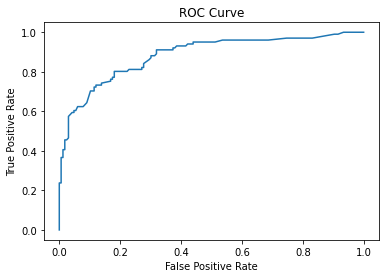

In [322]:
print('ROC curve : ')
model.plot_roc(x_test,y_test)

In [323]:
print('Area Under the Curve of ROC curve :',model.get_auc_score(x_test,y_test))

Area Under the Curve of ROC curve : 0.8833949660026243


In [324]:
confusion_matrix,precision,recall,f1_score=model.get_metrics(x_test,y_test)

In [325]:
print('Confusion Matrix : ')
print(np.array(confusion_matrix))

Confusion Matrix : 
[[143  23]
 [ 26  75]]


In [326]:
print('Precision : ')
print(precision)

Precision : 
76.53061224489795


In [327]:
print('Recall : ')
print(recall)

Recall : 
74.25742574257426


In [328]:
print('F1 Score : ')
print(f1_score)

F1 Score : 
75.37688442211056


# 4)Perform 5 fold cross validation and summarize the results across the cross-validation sets. Compute the probability of the top class for each row in the testing dataset.

In [329]:
#K-Fold from scratch
def kfold(data,k=5):
  cross_validation_array=[]
  n=len(data)
  interval=n//k
  splits=[]
  start=0
  for i in range(k):
    splits.append(data.iloc[start:start+interval,:])
    start=start+interval
  for i in range(k):
    train=[]
    testing_data=[]
    for j in range(k):
      if(j==i):
        testing_data=splits[j]
      else:
        train.append(splits[j])
    training_data=pd.concat(train)
    testing_data=pd.DataFrame(testing_data,columns=training_data.columns)
    model=GaussianNaiveBayes(training_data)
    x_test=testing_data.iloc[:,:-1]
    y_test=np.array(testing_data.iloc[:,-1])
    y_pred=np.array(model.predict(x_test))
    cross_validation_array.append(model.score(y_pred,y_test))
  return cross_validation_array
cv_array=np.array(kfold(train,5))
print(cv_array)

[0.7983871  0.7983871  0.7983871  0.75806452 0.79032258]


In [330]:
print('Cross validation Score is :',cv_array.mean()*100,'%')

Cross validation Score is : 78.87096774193549 %


In [331]:
#computing probability of top class :
model=GaussianNaiveBayes(train)
probability_array=model.predict_proba(x_test)
top_class_probability=[]
for i in range(len(probability_array)):
  if(probability_array[i][0]>probability_array[i][1]):
    top_class_probability.append(probability_array[i][0])
  else:
    top_class_probability.append(probability_array[i][1])
print(np.array(top_class_probability))

[0.68286584 0.6677155  0.93290857 0.714439   0.83672284 0.79012549
 0.60857212 0.70721576 0.68254373 0.51497133 0.73594641 0.81646641
 0.8000596  0.918555   0.88900158 0.55831506 0.83029476 0.66963278
 0.77348331 0.56474349 0.92096882 0.68012698 0.83567558 0.80736984
 0.51205228 0.56263234 0.93897396 0.89352287 0.91585585 0.57140959
 0.51809657 0.51550659 0.80014086 0.52651484 0.70018077 0.78307575
 0.73956772 0.91585585 0.74279828 0.50423201 0.50534618 0.82685691
 0.60314279 0.91585585 0.69429183 0.70265784 0.77238499 0.83150422
 0.87277083 0.92975237 0.91585585 0.55060492 0.70132931 0.81110599
 0.79637549 0.85489181 0.81475818 0.93066737 0.75520741 0.91585585
 0.67037922 0.88410477 0.70018077 0.91585585 0.55060492 0.7504693
 0.91585585 0.92457258 0.82461544 0.8963298  0.67890036 0.89053214
 0.54164833 0.88410477 0.66563578 0.79012549 0.88363426 0.92096882
 0.79184021 0.83567558 0.88363426 0.88900158 0.93897396 0.94651893
 0.80636815 0.7445735  0.57140959 0.51045995 0.91585585 0.55831

# 5)Make contour plots with the data points to visualize the class-conditional densities. What can you say about the assumption Naive Bayes model is based on from these plots? Explain in your report.

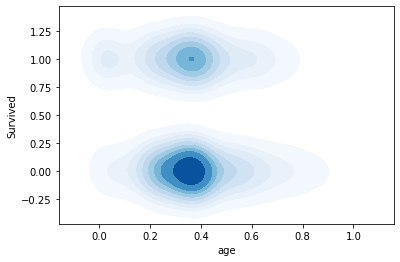

In [332]:
import seaborn as sns
sns.kdeplot(x=df.age, y=df.Survived,cmap="Blues",shade=True)

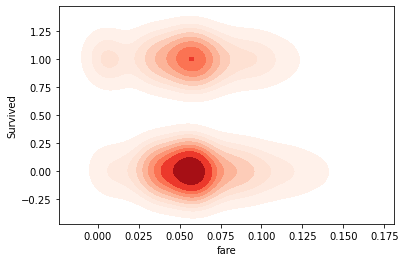

In [333]:
sns.kdeplot(x=df.fare, y=df.Survived,cmap="Reds",shade=True)

In [334]:
#As the contour plots comes out to be separated and the difference between the 2 clusters can be seen 
#so we can conclude that the features are independent

# 6)Compare your model with the Decision Tree classifier on the same dataset by performing 5-fold cross-validation and summarizing the results. Justify why one of them works better on this numeric dataset.

In [335]:
#training a model of DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

def kfold(data,k=5):
  cross_validation_array=[]
  n=len(data)
  interval=n//k
  splits=[]
  start=0
  for i in range(k):
    splits.append(data.iloc[start:start+interval,:])
    start=start+interval
  for i in range(k):
    train=[]
    testing_data=[]
    for j in range(k):
      if(j==i):
        testing_data=splits[j]
      else:
        train.append(splits[j])
    training_data=pd.concat(train)
    testing_data=pd.DataFrame(testing_data,columns=training_data.columns)
    model=DecisionTreeClassifier()
    model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1])
    x_test=testing_data.iloc[:,:-1]
    y_test=testing_data.iloc[:,-1]
    cross_validation_array.append(model.score(x_test,y_test))
  return cross_validation_array
cv_array=np.array(kfold(train,5))
print(cv_array)

[0.7983871  0.78225806 0.76612903 0.79032258 0.75806452]


In [336]:
print('Cross Validation Score for Decision Tree Classifier : ',cv_array.mean()*100,'%')

Cross Validation Score for Decision Tree Classifier :  77.9032258064516 %


In [337]:
#so we can clearly see cross validation score for Gaussian Naive Bayes is better in this case

# **Question 2**

In [338]:
df=pd.read_csv('/content/data.csv')
df

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# 1)Use histogram to plot the distribution of samples.

In [339]:
class_1_df=df[df.Y==1]
class_2_df=df[df.Y==2]
class_3_df=df[df.Y==3]

In [340]:
def plot_histogram(feature_name):
  plt.hist([list(class_1_df[feature_name]),list(class_2_df[feature_name]),list(class_3_df[feature_name])],color=['red','blue','green'],label=['class 1','class 2','class 3'])
  plt.legend()
  plt.show()

For X0


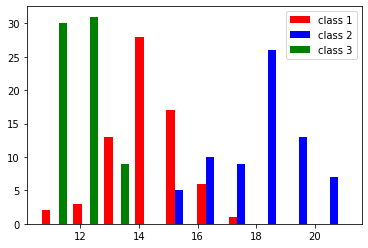

In [341]:
print('For X0')
plot_histogram('X0')

For X1


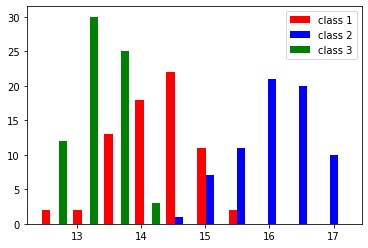

In [342]:
print('For X1')
plot_histogram('X1')

For X2


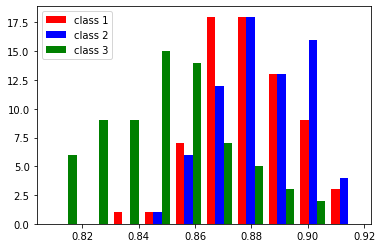

In [343]:
print('For X2')
plot_histogram('X2')

For X3


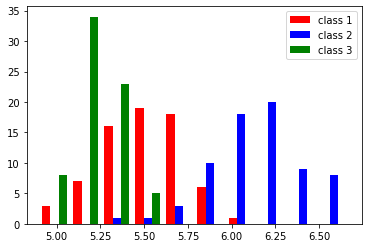

In [344]:
print('For X3')
plot_histogram('X3')

For X4


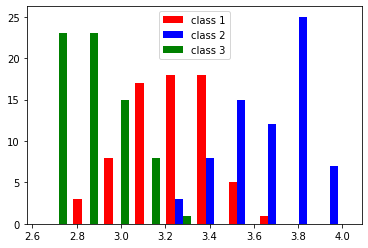

In [345]:
print('For X4')
plot_histogram('X4')

For X5


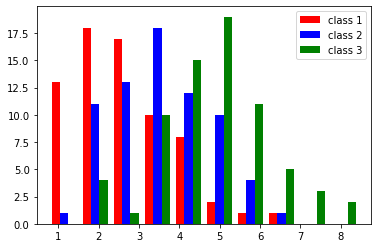

In [346]:
print('For X5')
plot_histogram('X5')

For X6


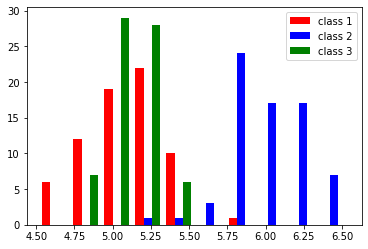

In [347]:
print('For X6')
plot_histogram('X6')

# 2)Determine the prior probability for all the classes.

In [348]:
def get_prior_probability(class_label,df=df):
  if(class_label==1):
    return len(class_1_df)/len(df)
  elif(class_label==2):
    return len(class_2_df)/len(df)
  else:
    return len(class_3_df)/len(df)

In [349]:
prior_class_1=get_prior_probability(1)
prior_class_2=get_prior_probability(2)
prior_class_3=get_prior_probability(3)

In [350]:
print('Prior Probability of class 1 =',get_prior_probability(1))
print('Prior Probability of class 2 =',get_prior_probability(2))
print('Prior Probability of class 3 =',get_prior_probability(3))

Prior Probability of class 1 = 0.3333333333333333
Prior Probability of class 2 = 0.3333333333333333
Prior Probability of class 3 = 0.3333333333333333


# 3)Discretize the features into bins from scratch. Use of pandas, scikit learn and scipy is not allowed for this subpart.

In [351]:
def discretize(feature_name,data,n):
  min=np.array(data[feature_name]).min()
  max=np.array(data[feature_name]).max()
  interval=(max-min)/n
  old_column=data[feature_name]
  new_column=[]
  for i in range(len(old_column)):
    if(old_column[i]>=min and old_column[i]<=min+interval):
      new_column.append(0)
    elif(old_column[i]>min+interval and old_column[i]<=min+2*interval):
      new_column.append(1)
    elif(old_column[i]>min+2*interval and old_column[i]<=min+3*interval):
      new_column.append(2)
    elif(old_column[i]>min+3*interval and old_column[i]<=min+4*interval):
      new_column.append(3)
    else:
      new_column.append(4)
  return new_column

In [352]:
df['x0']=discretize('X0',df,5)
del df['X0']

In [353]:
df['x1']=discretize('X1',df,5)
del df['X1']

In [354]:
df['x2']=discretize('X2',df,5)
del df['X2']

In [355]:
df['x3']=discretize('X3',df,5)
del df['X3']

In [356]:
df['x4']=discretize('X4',df,5)
del df['X4']

In [357]:
df['x5']=discretize('X5',df,5)
del df['X5']

In [358]:
df['x6']=discretize('X6',df,5)
del df['X6']

In [359]:
df['y']=df['Y']
del df['Y']

In [360]:
print('New Discretized dataframe :')
print(df)

New Discretized dataframe :
     x0  x1  x2  x3  x4  x5  x6  y
0     2   2   2   2   2   0   1  1
1     2   2   3   1   2   0   1  1
2     1   1   4   1   2   1   0  1
3     1   1   3   1   2   0   0  1
4     2   2   4   2   3   0   1  1
..   ..  ..  ..  ..  ..  ..  .. ..
205   0   0   3   0   1   1   0  3
206   0   0   1   0   0   2   1  3
207   1   1   3   0   2   4   1  3
208   0   0   1   0   0   1   1  3
209   0   0   2   0   1   3   1  3

[210 rows x 8 columns]


In [361]:
print(Counter(df['x0']))
print(Counter(df['x1']))
print(Counter(df['x2']))
print(Counter(df['x3']))
print(Counter(df['x4']))
print(Counter(df['x5']))
print(Counter(df['x6']))

Counter({0: 66, 1: 50, 2: 38, 3: 36, 4: 20})
Counter({1: 59, 0: 46, 2: 41, 3: 34, 4: 30})
Counter({3: 70, 2: 64, 4: 34, 1: 27, 0: 15})
Counter({1: 65, 0: 52, 3: 39, 2: 37, 4: 17})
Counter({0: 49, 2: 48, 1: 48, 3: 33, 4: 32})
Counter({1: 69, 2: 66, 0: 47, 3: 23, 4: 5})
Counter({1: 99, 3: 42, 0: 25, 4: 24, 2: 20})


# 4)Determine the likelihood/class conditional probabilities for all the classes.

In [362]:
class NaiveBayes(object):
  def __init__(self,df=df):
    self.df=df
    self.prior1=get_prior_probability(1,self.df)
    self.prior2=get_prior_probability(2,self.df)
    self.prior3=get_prior_probability(3,self.df)
    self.class_1_data=self.df[self.df['y']==1]
    self.class_2_data=self.df[self.df['y']==2]
    self.class_3_data=self.df[self.df['y']==3]
  def categorical_likelihood(self,feature_name,test_point_feature_value,class_label):
      '''
      We want P(f1=x1|y=ωi) ie. (count of datapoints with f1=x1 and y=ωi)/(count of number of ωi)
      '''
      if(class_label==1):
        class_1=self.class_1_data[feature_name]
        count_of_feature_labels=dict(Counter(class_1))
        return (1+(count_of_feature_labels.get(test_point_feature_value,0)))/(5+len(class_1))
      elif(class_label==2):
        class_2=self.class_2_data[feature_name]
        count_of_feature_labels=dict(Counter(class_2))
        return (1+(count_of_feature_labels.get(test_point_feature_value,0)))/(5+len(class_2))
      elif(class_label==3):
        class_3=self.class_3_data[feature_name]
        count_of_feature_labels=dict(Counter(class_3))
        return (1+(count_of_feature_labels.get(test_point_feature_value,0)))/(5+len(class_3))
  def get_likelihood(self,feature_vector,class_label):
      '''
      We want P(y=ωi|X=x)=(P(f1=x1|y=ωi)*P(f2=x2|y=ωi)*P(f3=x3|y=ωi)*P(f4=x4|y=ωi)*P(f5=x5|y=ωi))*P(ωi)
      For a single datapoint
      '''
      #for probability 0 we have feature x0 
      prob_0=self.categorical_likelihood('x0',feature_vector[0],class_label)
      #for probability 1 we have feature x1
      prob_1=self.categorical_likelihood('x1',feature_vector[1],class_label)
      #for probability 2 we have feature x2
      prob_2=self.categorical_likelihood('x2',feature_vector[2],class_label)
      #for probability 3 we have feature x3 
      prob_3=self.categorical_likelihood('x3',feature_vector[3],class_label)
      #for probability 4 we have feature x4
      prob_4=self.categorical_likelihood('x4',feature_vector[4],class_label)
      #for probability 5 we have feature x5
      prob_5=self.categorical_likelihood('x5',feature_vector[5],class_label)
      #for probability 6 we have feature x6 
      prob_6=self.categorical_likelihood('x6',feature_vector[6],class_label)
      return (prob_0*prob_1*prob_2*prob_3*prob_4*prob_5*prob_6) 
  def posterior_of_point(self,feature_vector):
    posterior_class_1=self.get_likelihood(feature_vector,1)*self.prior1
    posterior_class_2=self.get_likelihood(feature_vector,2)*self.prior2
    posterior_class_3=self.get_likelihood(feature_vector,3)*self.prior3
    evidence=posterior_class_1+posterior_class_2+posterior_class_3
    posterior_1=posterior_class_1/evidence
    posterior_2=posterior_class_2/evidence
    posterior_3=posterior_class_3/evidence
    return np.array([posterior_1,posterior_2,posterior_3])
  def predict_datapoint(self,feature_vector):
    posterior_1,posterior_2,posterior_3=self.posterior_of_point(feature_vector)
    if(posterior_1>posterior_2):
      if(posterior_1>posterior_3):
        return 1
      else:
        return 3
    else:
      if(posterior_3>posterior_2):
        return 3
      else:
        return 2
  def predict(self,x_test):
    y_pred=[]
    for i in range(len(x_test)):
      y_pred.append(self.predict_datapoint(list(x_test.iloc[i,:])))
    return np.array(y_pred)
  def predict_proba(self,x_test):
    prob_array=[]
    for i in range(len(x_test)):
      feature_vector=list(x_test.iloc[i,:])
      prob_array.append(list(self.posterior_of_point(feature_vector)))
    return np.array(prob_array)
  def score(self,y_pred,y_actual):
    '''
    Returns the accuracy score of our algorithm
    '''
    y_pred=np.array(y_pred)
    y_actual=np.array(y_actual)
    numerator=0
    for i in range(len(y_pred)):
      if(y_pred[i]==y_actual[i]):
        numerator+=1
    return numerator/len(y_pred)

In [363]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.8)

In [364]:
train=x_train.copy()
train['y']=y_train
model=NaiveBayes(train)

In [365]:
y_predict=model.predict(x_test)
print(y_predict)

[2 2 1 2 2 1 2 1 3 3 1 2 3 2 2 2 2 1 3 2 1 3 2 3 2 1 1 3 3 2 2 1 1 3 1 1 2
 1 2 3 2 1]


In [366]:
#for likelihood probability for each class we use method get_likelihood
for i in range(len(x_test)):
  print('For feature vector [x0, x1, x2, x3, x4, x5, x6]='+str(list(x_test.iloc[i,:])))
  print('For class 1 likelihood probability : ',model.get_likelihood(x_test.iloc[i,:],1))
  print('For class 2 likelihood probability : ',model.get_likelihood(x_test.iloc[i,:],2))
  print('For class 3 likelihood probability : ',model.get_likelihood(x_test.iloc[i,:],3))

For feature vector [x0, x1, x2, x3, x4, x5, x6]=[3, 4, 2, 4, 3, 1, 4]
For class 1 likelihood probability :  1.2294992627816084e-09
For class 2 likelihood probability :  0.0005003644372177981
For class 3 likelihood probability :  5.1405198946773526e-11
For feature vector [x0, x1, x2, x3, x4, x5, x6]=[4, 4, 3, 3, 4, 2, 4]
For class 1 likelihood probability :  8.909414947692816e-11
For class 2 likelihood probability :  0.0008217296250025964
For class 3 likelihood probability :  5.140519894677354e-11
For feature vector [x0, x1, x2, x3, x4, x5, x6]=[1, 1, 2, 1, 1, 0, 1]
For class 1 likelihood probability :  0.003068243849124016
For class 2 likelihood probability :  1.0639944075035186e-10
For class 3 likelihood probability :  0.00011527615863813966
For feature vector [x0, x1, x2, x3, x4, x5, x6]=[3, 4, 3, 4, 3, 0, 4]
For class 1 likelihood probability :  1.7106076699570208e-09
For class 2 likelihood probability :  0.00028423068623022847
For class 3 likelihood probability :  7.343599849539077

# 5)Plot the count of each unique element for each class. Compare the plot with the plot of distribution.

In [367]:
def plot_count(feature_name):
  class_1=df[df['y']==1]
  counter=Counter(class_1[feature_name])
  x1=list(counter.keys())
  y1=list(counter.values())
  plt.scatter(x1,y1,color='blue',label='class 1')
  class_2=df[df['y']==2]
  counter=Counter(class_2[feature_name])
  x2=list(counter.keys())
  y2=list(counter.values())
  plt.scatter(x2,y2,color='red',label='class 2')
  class_3=df[df['y']==3]
  counter=Counter(class_3[feature_name])
  x3=list(counter.keys())
  y3=list(counter.values())
  plt.scatter(x3,y3,color='green',label='class 3')
  plt.xlabel(feature_name.upper()+'_bins')
  plt.ylabel('Count')
  plt.title(feature_name.upper())
  plt.legend()
  plt.show()

New data visualisation : 


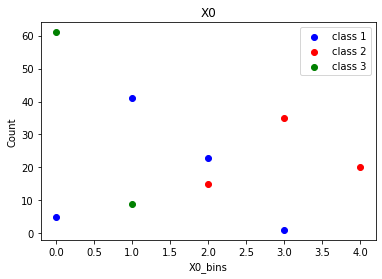

Old data visualisation : 


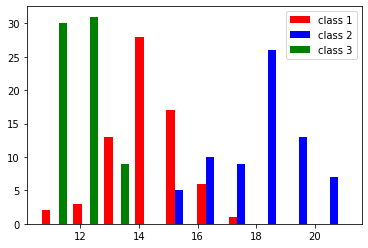

In [368]:
#for x0:
print('New data visualisation : ')
plot_count('x0')
print('Old data visualisation : ')
plot_histogram('X0')

New data visualisation : 


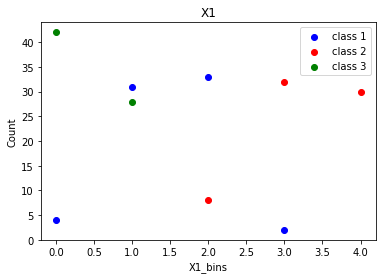

Old data visualisation : 


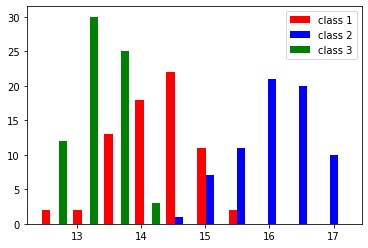

In [369]:
#for x1:
print('New data visualisation : ')
plot_count('x1')
print('Old data visualisation : ')
plot_histogram('X1')

New data visualisation : 


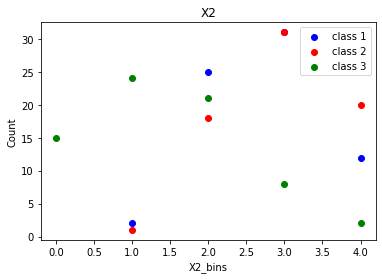

Old data visualisation : 


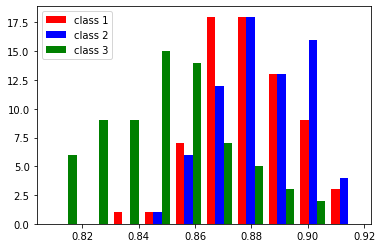

In [370]:
#for x2:
print('New data visualisation : ')
plot_count('x2')
print('Old data visualisation : ')
plot_histogram('X2')

New data visualisation : 


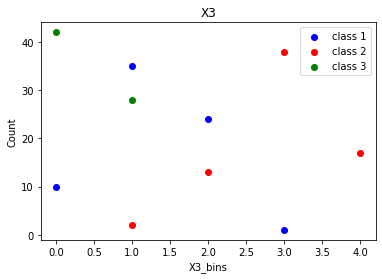

Old data visualisation : 


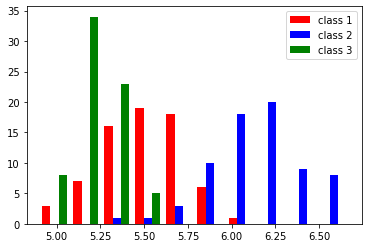

In [371]:
#for x3:
print('New data visualisation : ')
plot_count('x3')
print('Old data visualisation : ')
plot_histogram('X3')

New data visualisation : 


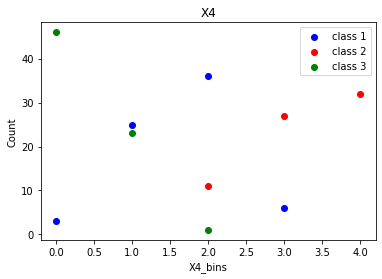

Old data visualisation : 


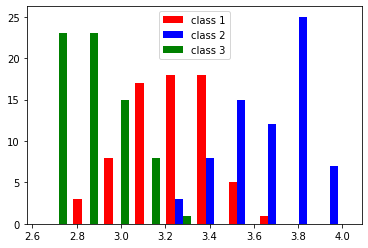

In [372]:
#for x4:
print('New data visualisation : ')
plot_count('x4')
print('Old data visualisation : ')
plot_histogram('X4')

New data visualisation : 


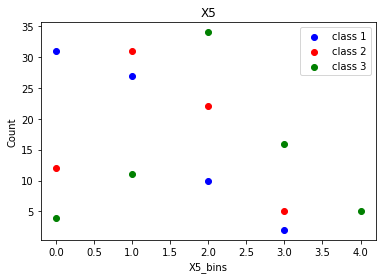

Old data visualisation : 


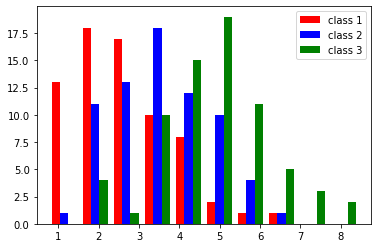

In [373]:
#for x5:
print('New data visualisation : ')
plot_count('x5')
print('Old data visualisation : ')
plot_histogram('X5')

New data visualisation : 


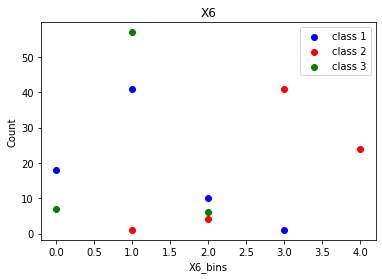

Old data visualisation : 


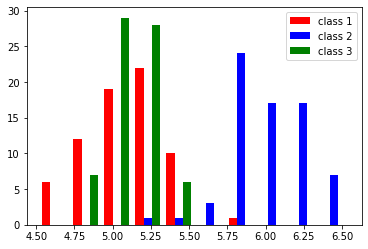

In [374]:
#for x6:
print('New data visualisation : ')
plot_count('x6')
print('Old data visualisation : ')
plot_histogram('X6')

In [375]:
#simultaneously visualising both plots together we can clearly see the data
#distribution class wise over the bins is nearly same ie. initially
#if there were many points of class 1 for lower values of feature
#then finally also we find more number of points of class 1 in initial bins

# 6)Calculate the posterior probabilities and plot them in a single graph. Analyze the plot.

In [376]:
model=NaiveBayes(train)
probability_array=model.predict_proba(x_test)
print('Posterior probability for each datapoints : ')
print(probability_array)

Posterior probability for each datapoints : 
[[2.45720124e-06 9.99997440e-01 1.02735254e-07]
 [1.08422687e-07 9.99999829e-01 6.25573042e-08]
 [9.63789685e-01 3.34219471e-08 3.62102812e-02]
 [6.01834149e-06 9.99993956e-01 2.58366032e-08]
 [4.19609299e-01 5.80385301e-01 5.39938477e-06]
 [9.97881199e-01 2.08978740e-03 2.90134769e-05]
 [2.54495792e-06 9.99997242e-01 2.12808698e-07]
 [9.98892853e-01 2.04049900e-06 1.10510685e-03]
 [1.06513005e-03 1.65968869e-07 9.98934704e-01]
 [1.17637417e-04 3.73271480e-09 9.99882359e-01]
 [9.88394449e-01 3.12421353e-07 1.16052383e-02]
 [8.09286493e-04 9.99190664e-01 4.98100146e-08]
 [1.17477575e-05 8.10762332e-10 9.99988251e-01]
 [3.55779006e-07 9.99999564e-01 7.98295555e-08]
 [1.26991677e-07 9.99999831e-01 4.24760395e-08]
 [3.56277437e-08 9.99999958e-01 5.99560448e-09]
 [4.50468098e-07 9.99999546e-01 3.86769861e-09]
 [6.13049960e-01 1.08421527e-07 3.86949931e-01]
 [1.43909649e-05 6.49138060e-10 9.99985608e-01]
 [2.46001087e-08 9.99999959e-01 1.65592886e

In [377]:
print('Score of our model is :',model.score(y_predict,y_test)*100,'%')

Score of our model is : 95.23809523809523 %


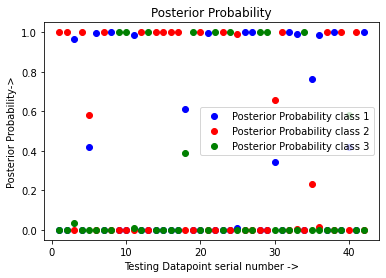

In [378]:
#so our model performs really well with such high score
#Now plotting posterior probability
prob_class_1=[]
prob_class_2=[]
prob_class_3=[]
for i in range(len(probability_array)):
  prob_class_1.append(probability_array[i][0])
  prob_class_2.append(probability_array[i][1])
  prob_class_3.append(probability_array[i][2])
x=np.arange(1,len(probability_array)+1)
plt.scatter(x,prob_class_1,color='blue',label='Posterior Probability class 1')
plt.scatter(x,prob_class_2,color='red',label='Posterior Probability class 2')
plt.scatter(x,prob_class_3,color='green',label='Posterior Probability class 3')
plt.legend()
plt.xlabel('Testing Datapoint serial number ->')
plt.ylabel('Posterior Probability->')
plt.title('Posterior Probability')
plt.show()

In [379]:
#So, we can clearly see that the model is very accurate and probability of
#correct class prediction is very high ie. the model is confident and accurate
#so, we can conclude that the binning and discretisation worked well and we
#we able to train a good model.